<a href="https://colab.research.google.com/github/ronjonsarker111/SoftwareIntegration1/blob/master/Lab_1_Morphology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()  # This will open a file dialog to upload the image


Saving Mor.jfif to Mor.jfif


Saving Mor.jfif to Mor (1).jfif


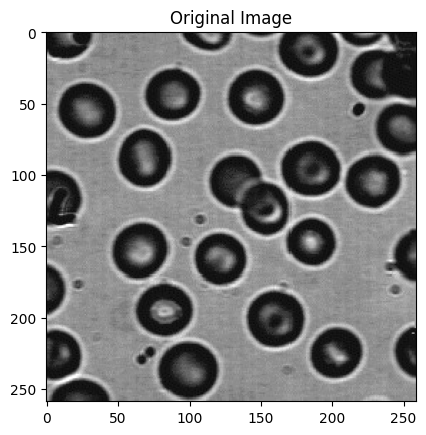

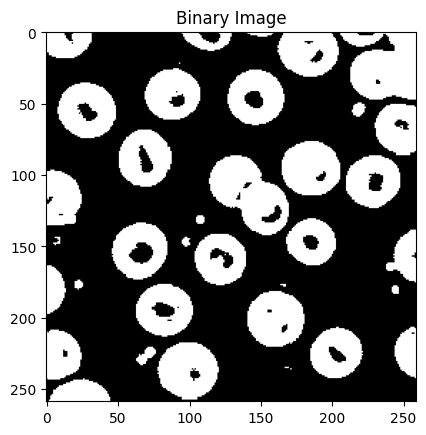

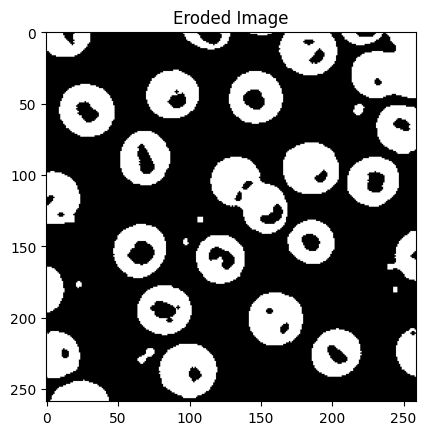

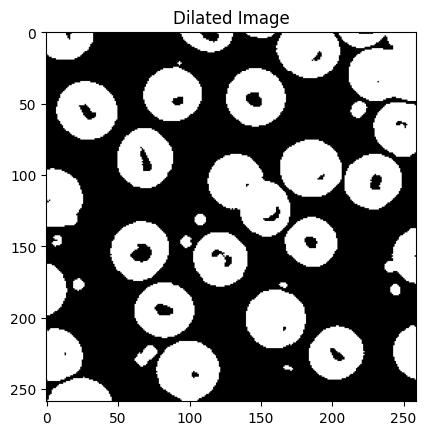

Number of cells: 38


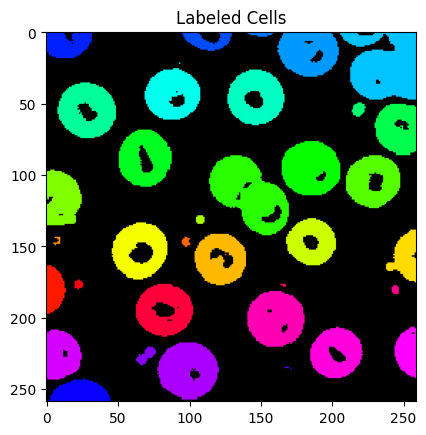

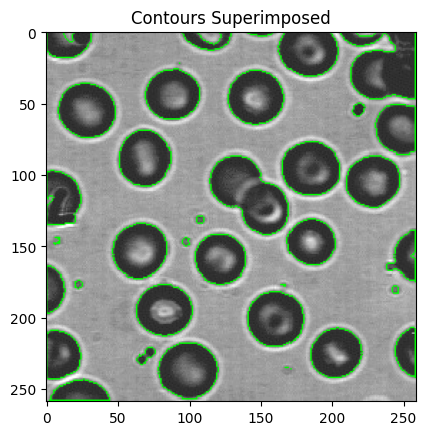

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Step 1: Upload the image file
uploaded = files.upload()  # This will allow you to upload 'Mor.jfif'

# Step 2: Read the image (adjust filename if necessary)
image = cv2.imread('Mor.jfif', cv2.IMREAD_GRAYSCALE)

# Step 3: Display the original image
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.show()

# Step 4: Convert the image to binary
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)

# Display the binary image
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.show()

# Step 5: Apply Morphological Operations (Erosion and Dilation)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))

# Erode the image
eroded_image = cv2.erode(binary_image, kernel, iterations=1)

# Display eroded image
plt.imshow(eroded_image, cmap='gray')
plt.title('Eroded Image')
plt.show()

# Dilate the image
dilated_image = cv2.dilate(binary_image, kernel, iterations=1)

# Display dilated image
plt.imshow(dilated_image, cmap='gray')
plt.title('Dilated Image')
plt.show()

# Step 6: Label connected components
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_image, connectivity=8)
print(f'Number of cells: {num_labels - 1}')  # Subtract 1 for background

# Visualize the labeled components
label_hue = np.uint8(179 * labels / np.max(labels))
blank_ch = 255 * np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
labeled_img[label_hue == 0] = 0  # Set background to black

plt.imshow(labeled_img)
plt.title('Labeled Cells')
plt.show()

# Step 7: Extract and superimpose contours
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contoured_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
cv2.drawContours(contoured_image, contours, -1, (0, 255, 0), 1)

plt.imshow(contoured_image)
plt.title('Contours Superimposed')
plt.show()
